# Network Notes

In [1375]:
# good 160 unit *3 network
network_model = "func-21-2-3"
iter1 = 100
iter2 = 430
codec = 3200
model_type = 'functional'
'''
network_model = "tale-prog-large3dense5"
iter1 = 5
iter2 = 50

network_model = "tale-prog-large3dense6"
iter1 = 5
iter2 = 30

network_model = "tale-prog-large3alt1"
iter1 = 5 #good
iter2 = 110

network_model = "tale-prog-quick2"
iter1 = 55
iter2 = 340
'''
# full set of 320 unit *3 network
#network_model = "tale-prog-stateful8l"
#iter1 = 500
#iter2 = 505

#network_model = "tale-prog-lg123alt"
#iter1 = 5
#iter2 = 55

from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



Generated multiple frames in one action: 1 
Generated multiple frames in one action: 1 
Generated multiple frames in one action: 1 
Generated multiple frames in one action: 1 
wrote frames:  200 
saving config 
Training Iteration 141 
using full set of frames 
Training Iteration 142 
using full set of frames 
Training Iteration 143 
using full set of frames 

13900/48451 [=======>......................] - ETA: 351s - loss: 24.0631 - main_output_loss: 18.0219 - mid_output_loss: 30.2061'


In [1376]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


start_iteration :  140
num_iterations :  1200
fit_batch_size :  100
learn_next_step :  True
gen_every_nth :  10
save_model_every_nth :  10
framelen :  13
frame_seq_len :  100
seed_seq_len :  100
seq_step :  100
test_data_fn :  ./test/criticalpracticalreason.c2-3200
frame_prop_orig_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
frame_prop_loss_scale :  [1000.0, 1000.0, 1000.0, 700.0, 600.0, 500.0, 400.0, 300.0, 200.0, 100.0, 60.0, 31.0, 16.0]
stateful :  False
shuffle :  False
limit_frames :  0
optimizer :  {'name': 'Nadam', 'params': {}}
generate_len :  200
model_filename :  out/func-21-2-3/model-140.h5
frame_len_ms :  20


In [1377]:
try:
  with open(home + "/store/c2gen/out/" + network_model + '/notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

# func-21-2-3 Notes

2017-11-24 15:35:46

Run with arguments ./test/criticalpracticalreason.c2-3200 none

## Description

Another fix in the second set of dense layers


In [1378]:
if model_type != 'functional':
  nd.model_config(network_model)

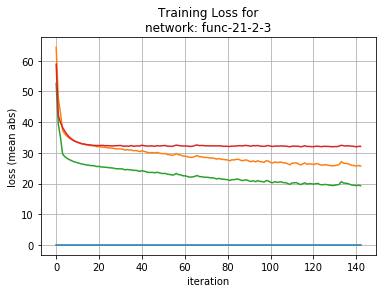

In [1379]:
nd.plot_training_loss(network_model, 'mean abs') 

In [1380]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    print(str.join("",f.readlines()[-10:]))

with open(home + "/store/c2gen/out/"+network_model+"/iteration_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

0,27.1152614403,20.6254339705,32.4491368654
0,26.6343464117,20.1687400316,32.3280314189
0,26.5294491264,20.0862029175,32.2162305648
0,26.4724150876,20.0114390467,32.3048797232
0,26.1911460757,19.7463527674,32.223966061
0,25.9273060737,19.4910223956,32.1814179108
0,25.875243065,19.454083056,32.1057995663
0,25.6874145918,19.3006838865,31.9336530509
0,25.8822682733,19.4614333013,32.1041743818
0,25.7132178233,19.2912640719,32.1097682786

140


Latest Iteration: 140
3200 rate codec



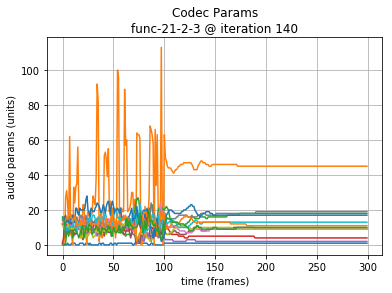

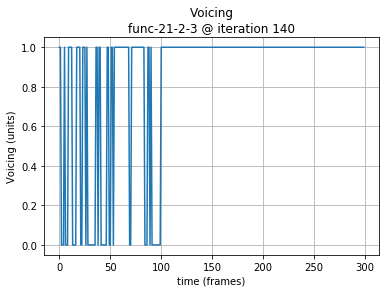

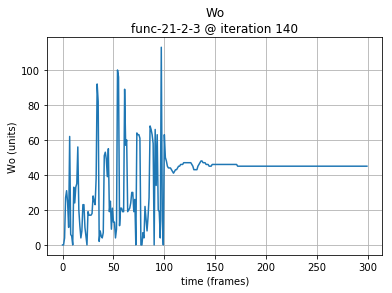

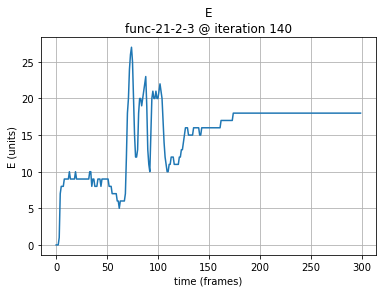

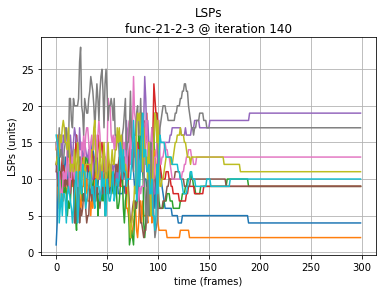

In [1381]:
try:
  print("Latest Iteration:", latest_iter)
  nd.plot_codec_params(network_model,latest_iter, scale_up='orig')
  nd.plot_spec_params(network_model,latest_iter, params='Voicing')
  nd.plot_spec_params(network_model,latest_iter, params='Wo')
  nd.plot_spec_params(network_model,latest_iter, params='E')
  nd.plot_spec_params(network_model,latest_iter, params='LSPs')
except FileNotFoundError:
    print("File not found")

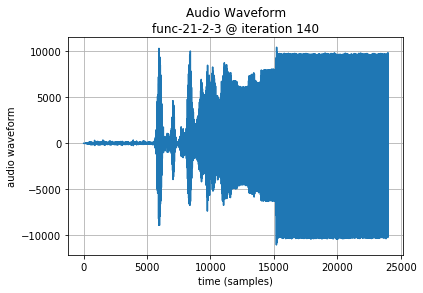

In [1382]:
#print(latest_iter)
#print(home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)+codec_sub+".wav")
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)
#print(home + "/store/c2gen/c2towav.sh", cb)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, latest_iter)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

Early Iterations
===

3200 rate codec



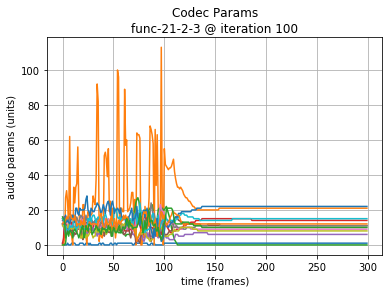

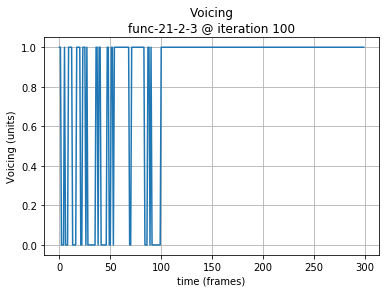

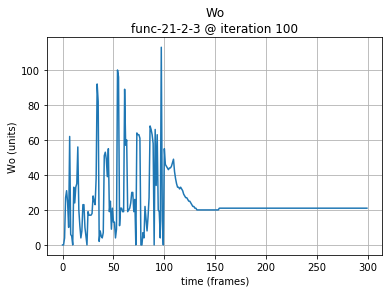

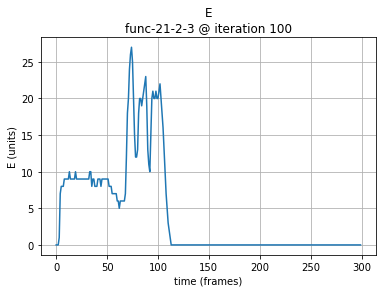

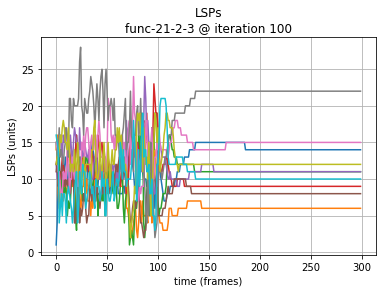

In [1383]:
nd.plot_codec_params(network_model,iter1, scale_up='orig')
nd.plot_spec_params(network_model,iter1, params='Voicing')
nd.plot_spec_params(network_model,iter1, params='Wo')
nd.plot_spec_params(network_model,iter1, params='E')
nd.plot_spec_params(network_model,iter1, params='LSPs')

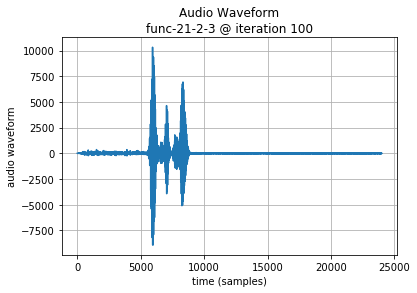

In [1384]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [1385]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+codec_sub+".wav"))

Later Iterations
===

In [1386]:
nd.plot_codec_params(network_model,iter2, scale_up=True)
nd.plot_spec_params(network_model,iter2, params='Voicing')
nd.plot_spec_params(network_model,iter2, params='Wo')
nd.plot_spec_params(network_model,iter2, params='E')
nd.plot_spec_params(network_model,iter2, params='LSPs')

FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/func-21-2-3/out-c2cb-430'

In [ ]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+codec_sub+".wav"))